## ANALYSIS OF AIR TEMPERATURE DATA IN SOUTH-EASTERN NIGERIA
The data is from two states in the south-east of Nigeria,Enugu and Port-Harcourt.
It covers the average monthly temperatures over the course of 120 months.
The 120 months spans January of 2009 to December 2018.


### OBJECTIVES
1. To analyse the data for trends using statistical tools
2. To test for inhomogeneities in the data
3. To visualize the data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
import pyhomogeneity as hg
import seaborn as sns

%matplotlib inline

In [132]:
df = pd.read_excel('dbs data.xlsx')
df.head()

,STATE,MONTH,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ENUGU,JAN,27.874194,26.900000,27.200000,27.212903,27.209677,27.835484,26.714516,27.043548,27.466129,26.256452
1,ENUGU,FEB,28.957143,30.160714,28.031034,29.264286,28.826786,29.052155,29.030727,28.991071,29.008929,28.562377
2,ENUGU,MAR,29.974194,30.722581,30.145161,29.116129,29.529032,29.967742,29.625806,29.037097,29.288710,29.412903
3,ENUGU,APR,28.240000,29.836667,28.790000,27.983333,28.521667,28.871667,29.191667,29.298333,28.745000,28.001667
4,ENUGU,MAY,27.300000,28.051613,27.103226,27.487097,28.000000,27.582258,27.285484,26.995161,26.988710,27.253226


In [133]:
df.tail()

,STATE,MONTH,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
19,PORT HARCOURT,AUG,26.158065,25.367742,26.290323,25.816129,25.853226,25.932258,25.793548,26.038710,26.282258,26.261290
20,PORT HARCOURT,SEP,26.396667,26.393333,26.523333,26.360000,25.863333,26.016667,26.486667,26.444167,26.185833,26.288333
21,PORT HARCOURT,OCT,27.161290,27.167742,27.000000,26.629032,26.927419,27.227419,27.270968,27.063710,26.894355,26.788710
22,PORT HARCOURT,NOV,28.440000,27.976667,27.650000,28.036667,27.970000,27.903333,28.313333,28.345833,27.760833,27.921667
23,PORT HARCOURT,DEC,27.251613,28.819355,27.938710,27.425806,27.459677,27.493548,27.864516,27.587903,27.478226,27.208065


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STATE   24 non-null     object 
 1   MONTH   24 non-null     object 
 2   2009    24 non-null     float64
 3   2010    24 non-null     float64
 4   2011    24 non-null     float64
 5   2012    24 non-null     float64
 6   2013    24 non-null     float64
 7   2014    24 non-null     float64
 8   2015    24 non-null     float64
 9   2016    24 non-null     float64
 10  2017    24 non-null     float64
 11  2018    24 non-null     float64
dtypes: float64(10), object(2)
memory usage: 2.4+ KB



As seen from the above, the data has 24 rows and 12 columns. The year columns (2009-2018) have integer temperature values in celsius. The month and state columns have object (string) values (January - December, and Enugu and Port-Harcourt respectively).

The first 12 rows of the data are for Enugu while the last 12 rows are Port-Harcourt. The 'STATE' column is not needed so it will be dropped. The data will be split in two accordingly .

In [135]:
df = df.drop(['STATE'], axis=1)
df_Enugu = df[:12].copy()
df_PH = df[12:].copy()

In [136]:
df_Enugu.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,27.552217,27.926726,27.427683,27.063395,27.413648,27.494301,27.339931,27.271832,27.212187,27.128668
std,1.255520,1.582390,1.265504,1.449627,1.247956,1.353277,1.343973,1.291731,1.314578,1.197469
min,25.960000,26.113333,25.911290,24.093333,25.874194,25.771667,25.680645,25.758065,25.563333,25.554839
25%,26.495161,26.736290,26.371492,25.982742,26.077110,26.206747,26.411895,26.380672,26.086694,26.179839
50%,27.587097,27.515806,27.151613,27.183118,27.387097,27.443548,27.052419,27.019355,27.120161,26.969355
75%,28.305806,28.856667,28.093437,27.734543,28.404167,28.335417,28.133932,28.305268,28.148750,27.858542
max,29.974194,30.722581,30.145161,29.264286,29.529032,29.967742,29.625806,29.298333,29.288710,29.412903


From the above:
   1. The average yearly temperature in Enugu is about 27 degrees Celsius
   2. The record maximum temperature is 30.72 degrees Celsius (in 2010)
   3. The record minimum temperature is 24.09 degrees Celsius (in 2012)
   4. Average standard deviation is less than 1.6

In [137]:
df_PH.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,27.173153,27.384136,27.697715,27.139704,27.207570,27.287828,27.365389,27.508726,27.519037,27.698521
std,0.968667,1.055810,1.040976,0.949458,0.979065,1.025650,1.086892,1.054198,1.027681,1.227002
min,25.964516,25.367742,26.290323,25.816129,25.853226,25.932258,25.793548,26.038710,26.185833,26.261290
25%,26.337016,26.901559,26.834194,26.426290,26.414919,26.217702,26.535417,26.885266,26.741331,26.669355
50%,27.206452,27.525000,27.794355,26.980588,27.193548,27.360484,27.562903,27.325806,27.556048,27.564866
75%,27.717500,27.985726,28.294758,28.030941,28.122696,28.012500,28.370468,28.434980,28.140524,28.848452
max,28.709677,28.819355,29.422581,28.596774,28.430645,28.759677,28.727419,29.070833,29.095833,29.790323


From the above:
 1. The average yearly temperature in Port-Harcourt is about 27 degrees Celsius
 2. The record maximum temperature is 29.79 degrees Celsius (in 2018)
 3. The record minimum temperature is 25.37 degrees Celsius (in 2010)
 4. Average standard deviation is less than 1.3

### DATA VISUALIZATION

### A
#### 1. Plot of year-wise air temperature variation in Enugu State



<AxesSubplot:title={'center':'Year-wise air temperature variation in Enugu'}, xlabel='Months', ylabel='Temperature in Celsius'>

<Figure size 1200x800 with 0 Axes>

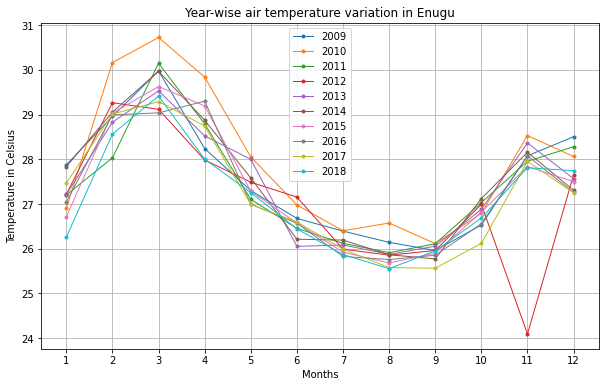

In [138]:
df_Enugu.index = range(1,13,1)

plt.figure(dpi = 200)
df_Enugu.plot(
    figsize = (10,6), grid = True,title = 'Year-wise air temperature variation in Enugu',
    xlabel= 'Months', ylabel = 'Temperature in Celsius',legend = True, linestyle = 'solid',
    marker = 'o',linewidth = 1, markersize = 3, xticks = range(1,13,1)
    )

From the above:
 1. The plot shows a saddle-shaped yearly temperature with distinct peaks
 2. There is a major temperature peak in March and a minor peak in November
 3. The coldest period is between July and September
 4. 2010 was a particularly hot year with record temperatures in 5 different months
 5. The record lowest temperature in November 2012 appears to be an outlier

#### 2. Plot of average yearly temperature and slope in Enugu State 

The line values for the slope are generated thus:
 1. Calculate the arithmetic mean of each year in the data
 2. Fit a straight line to the values of that mean

In [139]:
mean_En = df_Enugu.iloc[:,1:].mean()
slope, intercept = np.polyfit(np.array(range(1,11,1)),np.array(mean_En), 1)
abline_values = pd.DataFrame(data = [slope * i + intercept for i in range(1,11,1)])

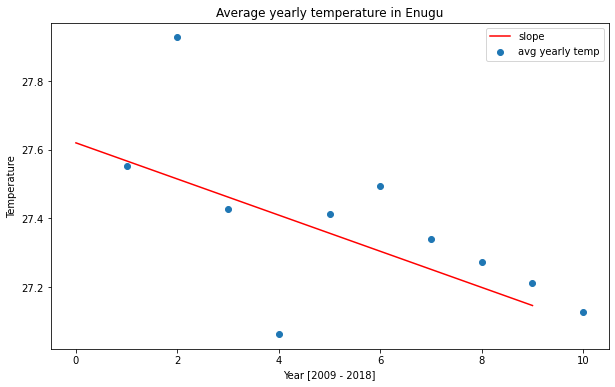

In [140]:
fig, axes = plt.subplots(nrows =1, ncols = 1,figsize=(10, 6))
axes.plot(abline_values, color = 'r', label = 'slope')
axes.scatter(np.array(range(1,11,1)), np.array(mean_En), label = 'avg yearly temp')
axes.set_xlabel('Year [2009 - 2018]')
axes.set_ylabel('Temperature')
axes.set_title('Average yearly temperature in Enugu')
axes.legend()

From the above:
 1. There appears to be a downward trend in the average yearly temperature  in Enugu

#### 3. Plot of month-wise air temperature in Enugu State

Convert the data from wide to long format

In [141]:
df_Enugu = df_Enugu.melt('MONTH', var_name = 'Year', value_name = 'Temperature')

Convert the data type of the 'Year' column from string to integer

In [142]:
df_Enugu = df_Enugu.astype({'Year':int})

<Figure size 4000x2400 with 0 Axes>

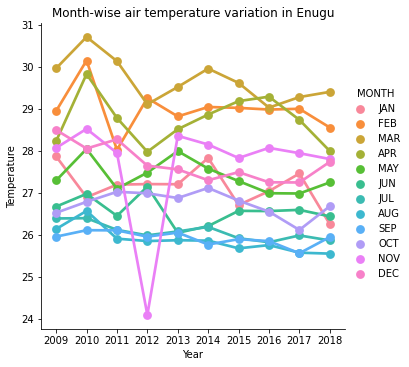

In [143]:
plt.figure(figsize = (10,6), dpi = 400)
sns.catplot(x = 'Year', y = 'Temperature', hue = 'MONTH', data = df_Enugu, kind = 'point', legend_out = True).set(
    title = 'Month-wise air temperature variation in Enugu'
)

From the above:
1. On average, March is the hottest month of the year with a peak temperature of ~31 degrees Celsius (2010)
2. On average, August-September is the coolest period of the year
3. It is confirmed that the lowest temperature (24 degrees Celsius in November 2012)is an outlier

<AxesSubplot:title={'center':'Cumulative air temperature variation in Enugu'}, xlabel='Months', ylabel='Temperature in Celsius'>

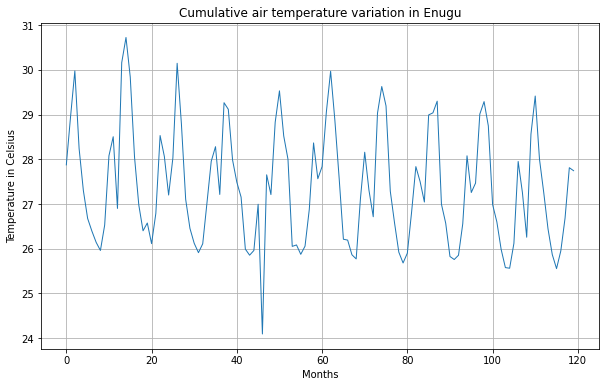

In [158]:
df_Enugu.iloc[:,2].plot(
    figsize = (10,6), grid = True,title = 'Cumulative air temperature variation in Enugu',
    xlabel= 'Months', ylabel = 'Temperature in Celsius', linestyle = 'solid', linewidth = 1
)

### B
#### 1. Plot of year-wise air temperature variation in Port-Harcourt

<AxesSubplot:title={'center':'Year-wise air temperature variation in Port-Harcourt'}, xlabel='Months [January - December]', ylabel='Temperature in Celsius'>

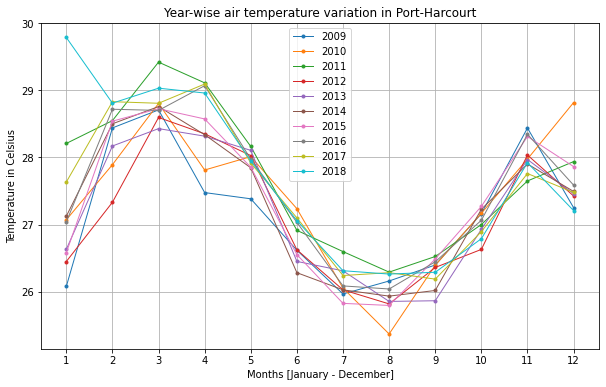

In [145]:
df_PH.index = range(1,13,1)
df_PH.plot(
    figsize = (10,6), grid = True,title = 'Year-wise air temperature variation in Port-Harcourt',
    xlabel= 'Months [January - December]',ylabel = 'Temperature in Celsius',legend = True, linestyle = 'solid',
    marker = 'o',linewidth = 1, markersize = 3, xticks = range(1,13,1)
)

From the above:
 1. The plot shows a saddle-shaped yearly temperature with distinct peaks
 2. There is a major temperature peak in March and a minor peak in November
 3. August is the coldest month, on average
 4. Temperature values of January 2018 and December 2010 appear to be outliers
 

#### 2. Plot of average yearly temperature and slope in Port-Harcourt

The line values for the slope are generated thus:
 1. Calculate the arithmetic mean of each year in the data
 2. Fit a straight line to the values of that mean

In [146]:
mean_PH = df_PH.iloc[:,1:].mean()
slope, intercept = np.polyfit(np.array(range(1,11,1)),np.array(mean_PH), 1)
abline_values = pd.DataFrame(data = [slope * i + intercept for i in range(1,11,1)])


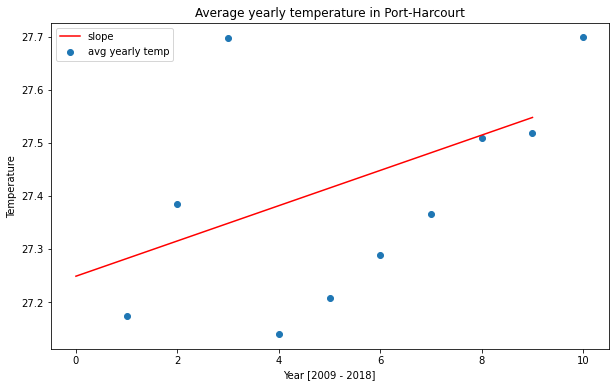

In [147]:
fig, axes = plt.subplots(nrows =1, ncols = 1,figsize=(10, 6))
axes.plot(abline_values, color = 'r', label = 'slope')
axes.scatter(np.array(range(1,11,1)), np.array(mean_PH), label = 'avg yearly temp')
axes.set_xlabel('Year [2009 - 2018]')
axes.set_ylabel('Temperature')
axes.set_title('Average yearly temperature in Port-Harcourt')
axes.legend()

From the above:
 1. There appears to be an upward trend in the average yearly temperature  in Port-Harcourt

#### 3. Plot of month-wise air temperature in Enugu State

Convert the data from wide to long format

In [148]:
df_PH = df_PH.melt('MONTH', var_name = 'Year', value_name = 'Temperature')

Convert the data type of the 'Year' column from string to integer

In [149]:
df_PH = df_PH.astype({'Year':int})

<Figure size 4000x2400 with 0 Axes>

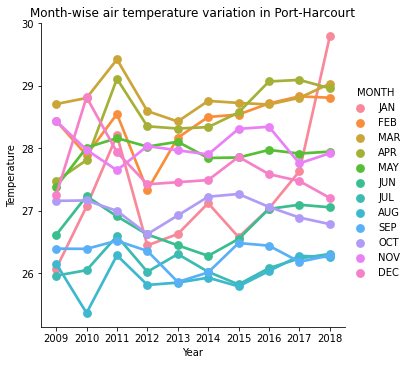

In [150]:
plt.figure(figsize = (10,6), dpi = 400)
sns.catplot(x = 'Year', y = 'Temperature', hue = 'MONTH', data = df_PH, kind = 'point', legend_out = True).set(
    title = 'Month-wise air temperature variation in Port-Harcourt'
)

From the above:
1. On average, March is the hottest month of the year with a peak temperature of ~30 degrees Celsius (2010)
2. On average, August is the coolest month of the year

<AxesSubplot:title={'center':'Cumulative air temperature variation in Port-Harcourt'}, xlabel='Months', ylabel='Temperature in Celsius'>

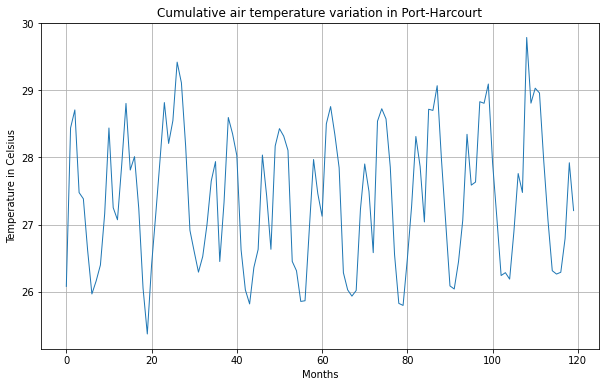

In [159]:
df_PH.iloc[:,2].plot(
    figsize = (10,6), grid = True,title = 'Cumulative air temperature variation in Port-Harcourt',
    xlabel= 'Months', ylabel = 'Temperature in Celsius', linestyle = 'solid', linewidth = 1
)

### STATISTICAL ANALYSIS

1. Multi-variate Mann-Kendall Test: The Mann-Kendall Trend Test (sometimes called the MK test) is used to analyze time series data for consistently increasing or decreasing trends (monotonic trends). All Mann-Kendall tests return a named tuple which contain:

    trend: tells the trend (increasing, decreasing or no trend)
    
    h: True (if trend is present) or False (if the trend is absence)
    
    p: p-value of the significance test
    
    z: normalized test statistics
    
    Tau: Kendall Tau
    
    s: Mann-Kendal's score
    
    var_s: Variance S
    
    slope: Theil-Sen estimator/slope
    
    intercept: intercept of Kendall-Theil Robust Line
    
2. Pettitt Test: The Pettitt test is a common tool for detection of a single unknown abrupt change point (inhomogeneity), in the sense of abrupt changes in the mean of the time series of environmental data. All Homogeneity tests return a named tuple which contain:
    
    h: True (if data is nonhomogeneous) or False (if data is homogeneous)
    
    cp: probable change point location
    
    p: p value of the significance test
    
    U/T/Q/R/V: test statistics which depends on the test method
    
    avg: mean values at before and after the change point

#### 1. Enugu State:

In [152]:
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.multivariate_test(
    df.iloc[:12,1:].values, alpha = 0.05)
print('trend =', trend,'\n','h =', h,'\n', 'slope =', slope)

trend = decreasing 
 h = True 
 slope = -0.17356720430107425


In [153]:
h, cp, p, U, mu = hg.pettitt_test(df_Enugu.iloc[:,2].values)
print('h =', h,'\n', 'probable change-point =', cp)

h = False 
 probable change-point = 41


From the above tests:
 1. It is confirmed that average yearly temperature decreased between 2009 - 2018 (downward trend)
 2. The data is homogenous
 3. Probable change point corresponds to may 2012

#### 2. Port-Harcourt:

In [154]:
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.multivariate_test(
    df.iloc[12:,1:].unstack().values)
print('trend =', trend,'\n','h =', h,'\n', 'slope =', slope)

trend = no trend 
 h = False 
 slope = 0.0015377250810719107


In [155]:
h, cp, p, U, mu = hg.pettitt_test(df.iloc[12:,1:].unstack().values)
print('h =', h,'\n', 'probable change-point =', cp)

h = False 
 probable change-point = 82


From the above tests:
 1. There is no trend in the data
 2. The data is homogenous
 3. Probable change point corresponds to October 2015

### CONCLUSION

1. The air temperature data for Enugu and Port-Harcourt was visualized and analysed systematically
2. It is shown that the data in the two states is homogenous
3. The trends and probable change points in the data were highlighted
4. The average temperature in both states is 27 degrees Celsius
5. March is the hottest month in both states for the period 2009 - 2018
6. July - September is the coldest period for the given time period
5. On average, Enugu has a cooler (downward trend) temperature than Port-Harcourt (no trend)